<a href="https://colab.research.google.com/github/pranshudiwan/NLP_CS_6200/blob/main/NLP_doc2vec%2Bwordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# Import Libraries
import pandas as pd
import numpy as np


In [3]:
# Import train data
url_train = 'https://raw.githubusercontent.com/pranshudiwan/NLP_CS_6200/main/train.csv'
train = pd.read_csv(url_train)

# Import est data
url_test = 'https://raw.githubusercontent.com/pranshudiwan/NLP_CS_6200/main/test.csv'
test = pd.read_csv(url_test)

In [4]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


Thus we have some null values in keyword and location columns. 

In [7]:
train.sample(10)

,id,keyword,location,text,target
5497,7844,quarantine,NaN,Reddit Will Now Quarantine Offensive Content h...,1
1332,1924,burning%20buildings,"St Charles, MD",I'm mentally preparing myself for a bomb ass s...,0
100,144,accident,UK,.@NorwayMFA #Bahrain police had previously die...,1
4306,6113,hellfire,NaN,Hellfire! We donÛªt even want to think about ...,0
6243,8916,snowstorm,This Is Paradise. Relax.,ÛÏ@LordBrathwaite: Everyone Here: Ahh I hate ...,1
6760,9686,tornado,"Dindigul,TamilNadu.",@kunalkapoor Photo of the Day: Storm\nChaser\n...,1
5563,7938,rainstorm,"Pennsylvania, USA",RAIN RAIN GO AWAY... A soaker is on the way \n...,0
3982,5658,flooding,NaN,Flooding kills 166 displace over one million i...,1
3974,5650,flooding,Global-NoLocation,#flood #disaster Burst Water Pipe Floods Apart...,1
5734,8183,rescuers,NaN,VIDEO: 'We're picking up bodies from water': R...,1


In [8]:
import re
train['text'] = train['text'].map(lambda x: re.sub(r'\W+', ' ', x))

In [9]:
train.sample(5)

,id,keyword,location,text,target
1500,2163,catastrophic,NaN,catastrophic fallen angel reveillertm macabrel...,0
6222,8881,smoke,NaN,If you wanna smoke cigs that s your own proble...,0
7086,10149,upheaval,NaN,The Great Upheaval By Winik Jay http t co Ef4s...,0
1879,2700,crush,NaN,Man crush everyday CristianInspire http t co i...,0
2487,3570,desolate,"Lahti, Finland",A new favorite Desolate 2 by r3do https t co H...,0


In [10]:
train = train.apply(lambda x: x.astype(str).str.lower())

In [11]:
train.sample(5)

,id,keyword,location,text,target
2086,2998,dead,nan,atchisonsean he is dead,0
7393,10580,windstorm,(a) property of the universe,the windstorm blew thru my open window and now...,0
7337,10503,wildfire,"riverside, california.",is la at risk for a giant wildfire which way l...,1
6471,9255,sunk,nan,japan fuso class battleship yamashiro naval co...,1
678,979,blazing,"dallas, tx",bright amp blazing fireman birthday party http...,0


In [12]:
train['keyword'] = train['keyword'].map(lambda x: re.sub(r'\W+', ' ', x))
train['location'] = train['location'].map(lambda x: re.sub(r'\W+', ' ', x))
train.sample(5)

,id,keyword,location,text,target
5396,7698,panicking,nan,dirk_nomissski yea but if someone faints why ...,1
3108,4459,electrocuted,nan,youth electrocuted in khulna http t co 3enyndx...,1
3091,4437,electrocute,budapest hungary,photo weallheartonedirection i wouldn ûªt let ...,0
6344,9072,structural 20failure,nan,investigators rule catastrophic structural fai...,1
3670,5224,fatality,rafael castillo,fatality,0


In [13]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

train['text']=train['text'].apply(lambda x: remove_emoji(x))
train.sample(5)

,id,keyword,location,text,target
5385,7685,panic,nan,dream magic the linden method lite version 1 ...,0
3629,5178,fatalities,nan,injuries illnesses and fatalities latest numbe...,1
968,1401,body 20bag,nan,check out vintage longaberger floral fabric sh...,0
4782,6804,loud 20bang,kenya,ercjmnea breaking news unconfirmed i just hear...,0
4742,6745,lava,di langit 7 bidadari,youngheroesid lava blast dan power red panthe...,1


In [14]:
!pip install pyspellchecker

     |████████████████████████████████| 2.7MB 8.8MB/s 


In [15]:
from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

#train['text']=train['text'].apply(lambda x : correct_spellings(x))
#train.sample(5)

In [16]:
text = 'corrrect me pleas. MY NLP preject is due tomrow'
correct_spellings(text)

'correct me please MY NLP project is due tomorow'

In [17]:
## Replacing common acronyms

def other_clean(text):
        """
            Other manual text cleaning techniques
        """
        # Typos, slang and other
        sample_typos_slang = {
                                "w/e": "whatever",
                                "usagov": "usa government",
                                "recentlu": "recently",
                                "ph0tos": "photos",
                                "amirite": "am i right",
                                "exp0sed": "exposed",
                                "<3": "love",
                                "luv": "love",
                                "amageddon": "armageddon",
                                "trfc": "traffic",
                                "16yr": "16 year"
                                }

        # Acronyms
        sample_acronyms =  { 
                            "mh370": "malaysia airlines flight 370",
                            "okwx": "oklahoma city weather",
                            "arwx": "arkansas weather",    
                            "gawx": "georgia weather",  
                            "scwx": "south carolina weather",  
                            "cawx": "california weather",
                            "tnwx": "tennessee weather",
                            "azwx": "arizona weather",  
                            "alwx": "alabama weather",
                            "usnwsgov": "united states national weather service",
                            "2mw": "tomorrow"
                            }

        
        # Some common abbreviations 
        sample_abbr = {
                        "$" : " dollar ",
                        "€" : " euro ",
                        "4ao" : "for adults only",
                        "a.m" : "before midday",
                        "a3" : "anytime anywhere anyplace",
                        "aamof" : "as a matter of fact",
                        "acct" : "account",
                        "adih" : "another day in hell",
                        "afaic" : "as far as i am concerned",
                        "afaict" : "as far as i can tell",
                        "afaik" : "as far as i know",
                        "afair" : "as far as i remember",
                        "afk" : "away from keyboard",
                        "app" : "application",
                        "approx" : "approximately",
                        "apps" : "applications",
                        "asap" : "as soon as possible",
                        "asl" : "age, sex, location",
                        "atk" : "at the keyboard",
                        "ave." : "avenue",
                        "aymm" : "are you my mother",
                        "ayor" : "at your own risk", 
                        "b&b" : "bed and breakfast",
                        "b+b" : "bed and breakfast",
                        "b.c" : "before christ",
                        "b2b" : "business to business",
                        "b2c" : "business to customer",
                        "b4" : "before",
                        "b4n" : "bye for now",
                        "b@u" : "back at you",
                        "bae" : "before anyone else",
                        "bak" : "back at keyboard",
                        "bbbg" : "bye bye be good",
                        "bbc" : "british broadcasting corporation",
                        "bbias" : "be back in a second",
                        "bbl" : "be back later",
                        "bbs" : "be back soon",
                        "be4" : "before",
                        "bfn" : "bye for now",
                        "blvd" : "boulevard",
                        "bout" : "about",
                        "brb" : "be right back",
                        "bros" : "brothers",
                        "brt" : "be right there",
                        "bsaaw" : "big smile and a wink",
                        "btw" : "by the way",
                        "bwl" : "bursting with laughter",
                        "c/o" : "care of",
                        "cet" : "central european time",
                        "cf" : "compare",
                        "cia" : "central intelligence agency",
                        "csl" : "can not stop laughing",
                        "cu" : "see you",
                        "cul8r" : "see you later",
                        "cv" : "curriculum vitae",
                        "cwot" : "complete waste of time",
                        "cya" : "see you",
                        "cyt" : "see you tomorrow",
                        "dae" : "does anyone else",
                        "dbmib" : "do not bother me i am busy",
                        "diy" : "do it yourself",
                        "dm" : "direct message",
                        "dwh" : "during work hours",
                        "e123" : "easy as one two three",
                        "eet" : "eastern european time",
                        "eg" : "example",
                        "embm" : "early morning business meeting",
                        "encl" : "enclosed",
                        "encl." : "enclosed",
                        "etc" : "and so on",
                        "faq" : "frequently asked questions",
                        "fawc" : "for anyone who cares",
                        "fb" : "facebook",
                        "fc" : "fingers crossed",
                        "fig" : "figure",
                        "fimh" : "forever in my heart", 
                        "ft." : "feet",
                        "ft" : "featuring",
                        "ftl" : "for the loss",
                        "ftw" : "for the win",
                        "fwiw" : "for what it is worth",
                        "fyi" : "for your information",
                        "g9" : "genius",
                        "gahoy" : "get a hold of yourself",
                        "gal" : "get a life",
                        "gcse" : "general certificate of secondary education",
                        "gfn" : "gone for now",
                        "gg" : "good game",
                        "gl" : "good luck",
                        "glhf" : "good luck have fun",
                        "gmt" : "greenwich mean time",
                        "gmta" : "great minds think alike",
                        "gn" : "good night",
                        "g.o.a.t" : "greatest of all time",
                        "goat" : "greatest of all time",
                        "goi" : "get over it",
                        "gps" : "global positioning system",
                        "gr8" : "great",
                        "gratz" : "congratulations",
                        "gyal" : "girl",
                        "h&c" : "hot and cold",
                        "hp" : "horsepower",
                        "hr" : "hour",
                        "hrh" : "his royal highness",
                        "ht" : "height",
                        "ibrb" : "i will be right back",
                        "ic" : "i see",
                        "icq" : "i seek you",
                        "icymi" : "in case you missed it",
                        "idc" : "i do not care",
                        "idgadf" : "i do not give a damn fuck",
                        "idgaf" : "i do not give a fuck",
                        "idk" : "i do not know",
                        "ie" : "that is",
                        "i.e" : "that is",
                        "ifyp" : "i feel your pain",
                        "IG" : "instagram",
                        "iirc" : "if i remember correctly",
                        "ilu" : "i love you",
                        "ily" : "i love you",
                        "imho" : "in my humble opinion",
                        "imo" : "in my opinion",
                        "imu" : "i miss you",
                        "iow" : "in other words",
                        "irl" : "in real life",
                        "j4f" : "just for fun",
                        "jic" : "just in case",
                        "jk" : "just kidding",
                        "jsyk" : "just so you know",
                        "l8r" : "later",
                        "lb" : "pound",
                        "lbs" : "pounds",
                        "ldr" : "long distance relationship",
                        "lmao" : "laugh my ass off",
                        "lmfao" : "laugh my fucking ass off",
                        "lol" : "laughing out loud",
                        "ltd" : "limited",
                        "ltns" : "long time no see",
                        "m8" : "mate",
                        "mf" : "motherfucker",
                        "mfs" : "motherfuckers",
                        "mfw" : "my face when",
                        "mofo" : "motherfucker",
                        "mph" : "miles per hour",
                        "mr" : "mister",
                        "mrw" : "my reaction when",
                        "ms" : "miss",
                        "mte" : "my thoughts exactly",
                        "nagi" : "not a good idea",
                        "nbc" : "national broadcasting company",
                        "nbd" : "not big deal",
                        "nfs" : "not for sale",
                        "ngl" : "not going to lie",
                        "nhs" : "national health service",
                        "nrn" : "no reply necessary",
                        "nsfl" : "not safe for life",
                        "nsfw" : "not safe for work",
                        "nth" : "nice to have",
                        "nvr" : "never",
                        "nyc" : "new york city",
                        "oc" : "original content",
                        "og" : "original",
                        "ohp" : "overhead projector",
                        "oic" : "oh i see",
                        "omdb" : "over my dead body",
                        "omg" : "oh my god",
                        "omw" : "on my way",
                        "p.a" : "per annum",
                        "p.m" : "after midday",
                        "pm" : "prime minister",
                        "poc" : "people of color",
                        "pov" : "point of view",
                        "pp" : "pages",
                        "ppl" : "people",
                        "prw" : "parents are watching",
                        "ps" : "postscript",
                        "pt" : "point",
                        "ptb" : "please text back",
                        "pto" : "please turn over",
                        "qpsa" : "what happens", #"que pasa",
                        "ratchet" : "rude",
                        "rbtl" : "read between the lines",
                        "rlrt" : "real life retweet", 
                        "rofl" : "rolling on the floor laughing",
                        "roflol" : "rolling on the floor laughing out loud",
                        "rotflmao" : "rolling on the floor laughing my ass off",
                        "rt" : "retweet",
                        "ruok" : "are you ok",
                        "sfw" : "safe for work",
                        "sk8" : "skate",
                        "smh" : "shake my head",
                        "sq" : "square",
                        "srsly" : "seriously", 
                        "ssdd" : "same stuff different day",
                        "tbh" : "to be honest",
                        "tbs" : "tablespooful",
                        "tbsp" : "tablespooful",
                        "tfw" : "that feeling when",
                        "thks" : "thank you",
                        "tho" : "though",
                        "thx" : "thank you",
                        "tia" : "thanks in advance",
                        "til" : "today i learned",
                        "tl;dr" : "too long i did not read",
                        "tldr" : "too long i did not read",
                        "tmb" : "tweet me back",
                        "tntl" : "trying not to laugh",
                        "ttyl" : "talk to you later",
                        "u" : "you",
                        "u2" : "you too",
                        "u4e" : "yours for ever",
                        "utc" : "coordinated universal time",
                        "w/" : "with",
                        "w/o" : "without",
                        "w8" : "wait",
                        "wassup" : "what is up",
                        "wb" : "welcome back",
                        "wtf" : "what the fuck",
                        "wtg" : "way to go",
                        "wtpa" : "where the party at",
                        "wuf" : "where are you from",
                        "wuzup" : "what is up",
                        "wywh" : "wish you were here",
                        "yd" : "yard",
                        "ygtr" : "you got that right",
                        "ynk" : "you never know",
                        "zzz" : "sleeping bored and tired"
                        }
            
        sample_typos_slang_pattern = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in sample_typos_slang.keys()) + r')(?!\w)')
        sample_acronyms_pattern = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in sample_acronyms.keys()) + r')(?!\w)')
        sample_abbr_pattern = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in sample_abbr.keys()) + r')(?!\w)')
        
        text = sample_typos_slang_pattern.sub(lambda x: sample_typos_slang[x.group()], text)
        text = sample_acronyms_pattern.sub(lambda x: sample_acronyms[x.group()], text)
        text = sample_abbr_pattern.sub(lambda x: sample_abbr[x.group()], text)
        
        return text

In [18]:
## !Need to change variable names and abbrevations as appropriate
train["text"] = train["text"].apply(lambda x: other_clean(x))
train.sample(5)

,id,keyword,location,text,target
6372,9106,suicide 20bomb,dorito land,she s a suicide bomb,0
3935,5594,flood,united states,retweet grant_factory grants funds weymouth me...,1
3928,5586,flood,hawaii usa,iembot_hfo at 10 00 am 2 nnw hana maui co hi c...,1
6896,9885,traumatised,nan,emily4everever haha it s alright but more tha...,0
5844,8350,ruin,yulee fl,chrisdyson16 just wait until your friends at ...,0


In [19]:
## Removing single characters
train["text"] = train["text"].str.replace(r'\b\w\b','').str.replace(r'\s+', ' ')

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
def tokenizer(text):
    tokenized = []
    for string in text:
        string = re.sub('[^a-z\sA-Z]', '', string)
        string = re.sub('http\S+', '', string)
        tokenized.append([w for w in string.split() if w not in stop])
    return tokenized

In [22]:
train['tokenized'] = tokenizer(train["text"])

In [23]:
train.sample(5)

,id,keyword,location,text,target,tokenized
3150,4524,emergency,nan,emergency root canal tookitlikeaman lovemydent...,0,"[emergency, root, canal, tookitlikeaman, lovem..."
3976,5652,flooding,jakarta kuala lumpur s pore,myanmar msf assisting thousands as worst flood...,1,"[myanmar, msf, assisting, thousands, worst, fl..."
317,462,armageddon,california united states,pbban temporary 300 hyider_ghost2 armageddon ...,1,"[pbban, temporary, hyiderghost, armageddon, ki..."
3714,5282,fear,midwestern usa,cowgirllawyer we must refuse to become nation...,1,"[cowgirllawyer, must, refuse, become, nation, ..."
2485,3568,desolate,chicago illinois,understand why broke people be mad or always ...,0,"[understand, broke, people, mad, always, hav, ..."


In [24]:
# Performing stemming

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [26]:
def stem(unstemmed_list):  
  ps = PorterStemmer()

  final_stemmed_list = []

  for i in range(len(unstemmed_list)):
    sentence = unstemmed_list[i]
    #print(sentence)
    words = word_tokenize(sentence)
    stemmed_list = []
    for w in words:
        stemmed_list.append(ps.stem(w))
    stemmed_list = ' '.join(stemmed_list)
    final_stemmed_list.append(stemmed_list)

  return final_stemmed_list


In [27]:
unstemmed_list = train['text'].tolist()
train['stemmed_text'] = stem(unstemmed_list)

In [29]:
#Removing digits
train['stemmed_text'] = train['stemmed_text'].str.replace('\d+', '')

In [30]:
train.sample(5)

,id,keyword,location,text,target,tokenized,stemmed_text
4153,5902,harm,i love you zayn,if anything happens will fucking fly metlife w...,0,"[anything, happens, fucking, fly, metlife, hou...",if anyth happen will fuck fli metlif which is ...
1147,1652,bombing,puerto rico,japan marks 70th anniversary of hiroshima atom...,1,"[japan, marks, th, anniversary, hiroshima, ato...",japan mark th anniversari of hiroshima atom bo...
6369,9101,suicide 20bomb,nigeria,pic of 16 year old pkk suicide bomber who deto...,1,"[pic, year, old, pkk, suicide, bomber, detonat...",pic of year old pkk suicid bomber who deton b...
5838,8344,ruin,ca û ga,okgabby_ damn suh don let that ruin your year...,0,"[okgabby, damn, suh, let, ruin, year, bruh, ye...",okgabby_ damn suh don let that ruin your year ...
359,517,army,new york,infantry mens lume dial army analog quartz wri...,0,"[infantry, mens, lume, dial, army, analog, qua...",infantri men lume dial armi analog quartz wris...


In [83]:
# Data visualization imports
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# importing images
from google.colab import files
from IPython.display import Image


In [84]:
twitter_image = files.upload()

Saving twitter_mask.png to twitter_mask.png


In [48]:
# word cloud of keywords for both classes (starts)
disaster_tweets = train.groupby("target")

disaster_tweets.describe().head()

id         ...                                       stemmed_text     
       count unique  ...                                                top freq
target               ...                                                        
0       4342   4342  ...  black eye space battl occur at star o involv f...    7
1       3271   3271  ...   year old boy charg with manslaught of toddler...   10

[2 rows x 24 columns]

In [69]:
# divide disaster tweets by text
disaster_tweets = train[train['target'] == '1'].text
disaster_tweets = " ".join(line for line in disaster_tweets)

non_disaster_tweets = train[train['target'] == '0'].text
non_disaster_tweets = " ".join(line for line in non_disaster_tweets)

In [89]:
# Setting mask for wordcloud.
twitter_mask = np.array(Image.open('twitter_mask.png'))

In [131]:
# Function: plot_wordcloud
# Params: title (str) - title for the wordcloud,
#         text (str) - joined text to display
#         background_color (str) - "white", "black"
# Does: plots the wordcloud
def plot_wordcloud(title, text, background_color):
  stopwords = set(STOPWORDS)
  # update stowords (if needed)
  stopwords.update(["https", "co", "_"])


  wordcloud = WordCloud(mask=twitter_mask, stopwords=stopwords, background_color=background_color,
                        width=1800, height=1400).generate(text)
  plt.figure(figsize=(20,10))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.tight_layout(pad=0)

  plt.title(title,
              fontdict={
                  'size': 20,
                  'verticalalignment': 'bottom'
              })
  plt.show()

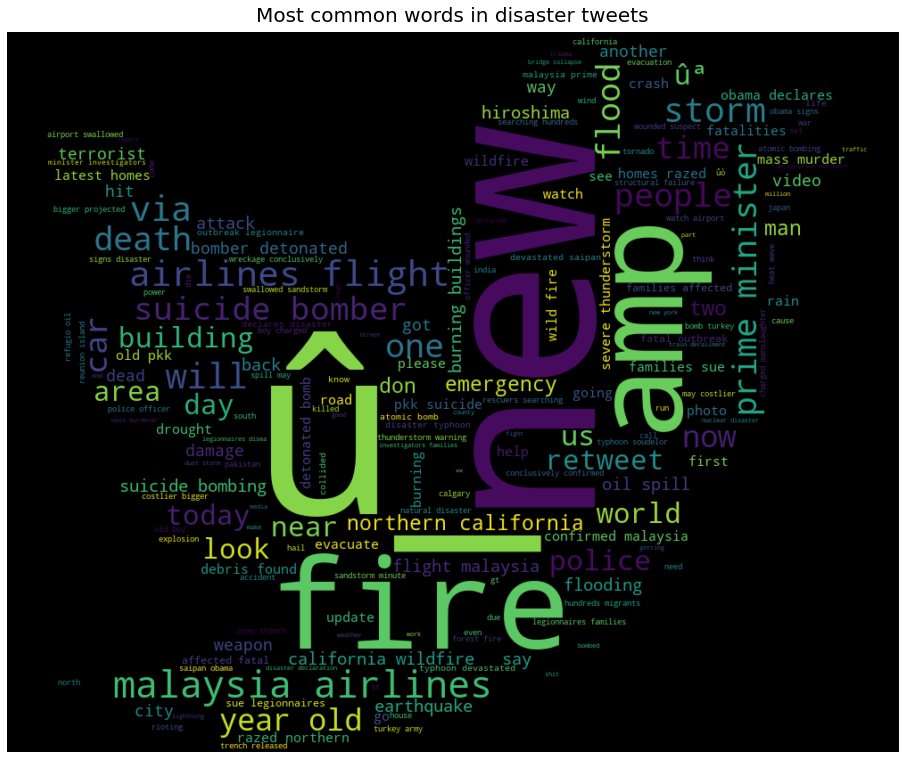

In [132]:
plot_wordcloud("Most common words in disaster tweets", disaster_tweets, "black")

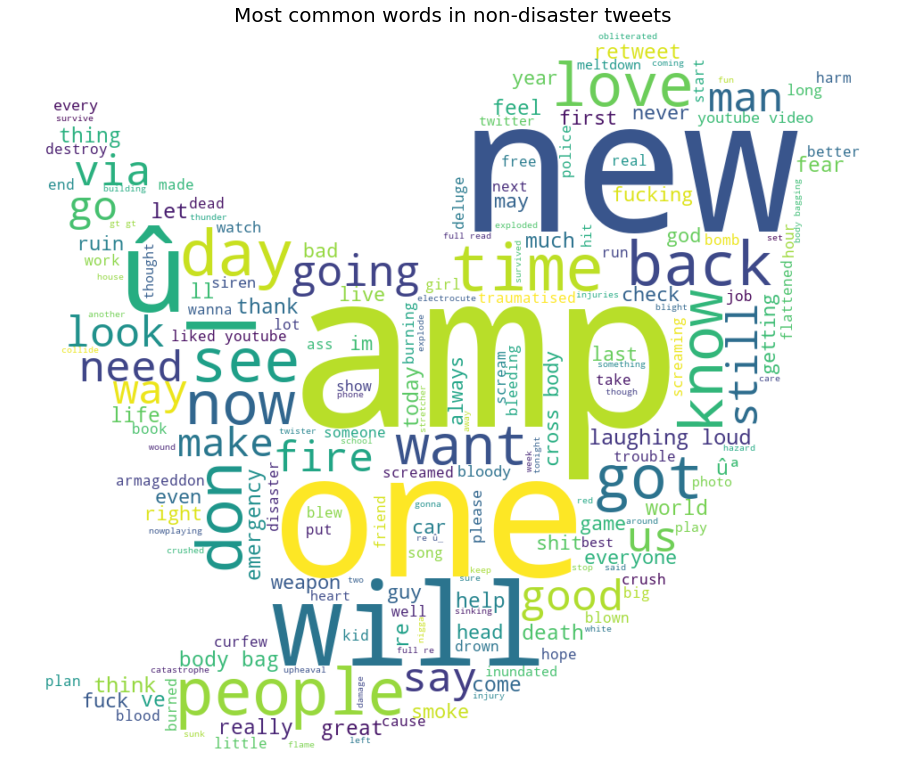

In [133]:
plot_wordcloud("Most common words in non-disaster tweets", non_disaster_tweets, "white")

Viz Ideas:
1. Class Distribution - Sindhu
2. Word cloud of keywords for both classes - Hearan
3. Bi-gram bar plot (bar plot of most frequently occuring words for both classes) - Pranshu
4. Average length of tweet for both classes - Sindhu
5. 

Data processing proposed steps: (Done)
1. Removal of punctuations, unwanted text
2. Performing stemming/lemmatization
3. Spell check
4. Removing emojis
5. Replacing common acronyms/shorhands
6.


EDA Ideas:
1. Clustering Tweets from same location over a short time period - (if many tweets come from the same location in a short time containing keywords for disasters they might actually be a disaster)
2. Clustering tweets via keyword - if the same keyword is being used over a short period of time it might mean a disaster
3. 

Models:
1. Word2Vec with GloVe
2. Simple LSTMs
3. LSTMs with Hidden layers
4. (Possibly) BERT



(Rough sketch)

Project doc: (numbers denote page numbers)

1. Names, Project title)
2. Introduction:
What is the problem we're trying to solve, How are we using NLP to solve the problem, Proposed method (in brief) on how we'll solve, Impact of problem on society (use-case irl)
3. Dataset used, data cleaning methods (and why it was necessary)
4. EDA: 
5. Visualizations
6. Models used (1 page each per model):
Explaining the model architecture in brief, why was it best to use this model (or appropriate), what was the model parameters (explain a few if needed), what were the results, and what metrics were used to obtain the resutls
9. Conclusions, model comparisons, final words
10. Team member contributions







